
# DESC SN Ia metric # 



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time

In [2]:
# Baseline Survey
baseline_file = get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

baseline_v2.1_10yrs


In [3]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(out_dir=outDir)

In [4]:
plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 4
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metric_name='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, use_cache=False)
#slicer = maf.HealpixSubsetSlicer(nside=16, hpid=[890], useCache=False)
#slicer = maf.HealpixSubsetSlicer(nside=16, hpid=[889], useCache=False)

metric = maf.SNNSNMetric(verbose=False)  
bundle = maf.MetricBundle(metric, slicer, None, plot_dict=plotDict,  
                        summary_metrics=sn_summary)

bg = maf.MetricBundleGroup({'sn': bundle}, baseline_file, outDir, resultsDb)

Healpix slicer using NSIDE=4, approximate resolution 879.484521 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 63121 799 79
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 73508 799 92
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 20774 799 26


/Users/yoachim/anaconda3/envs/guro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 50337 799 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 78302 799 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 88689 799 111


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dust_map.py:42: UserWarning: Slicer value of nside 4 different from map value 128, using slicer value
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plot_handler.py:587: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(


runtime= 1151.7553799152374 s


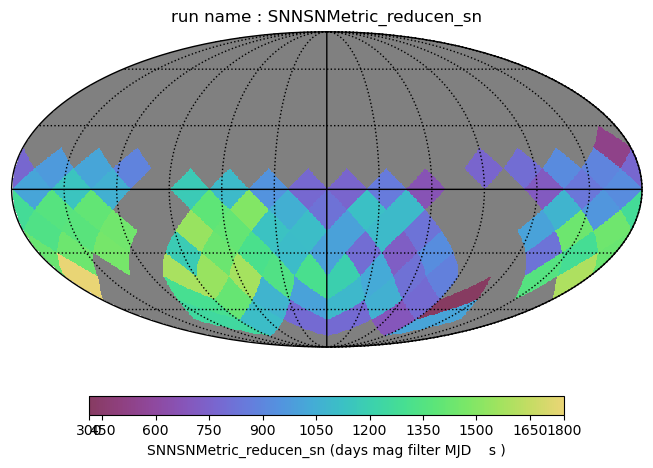

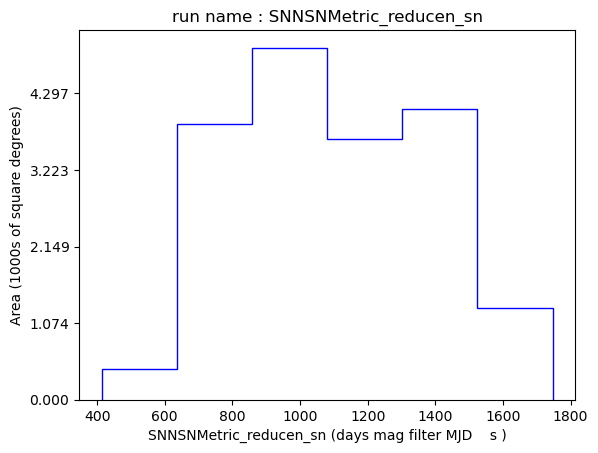

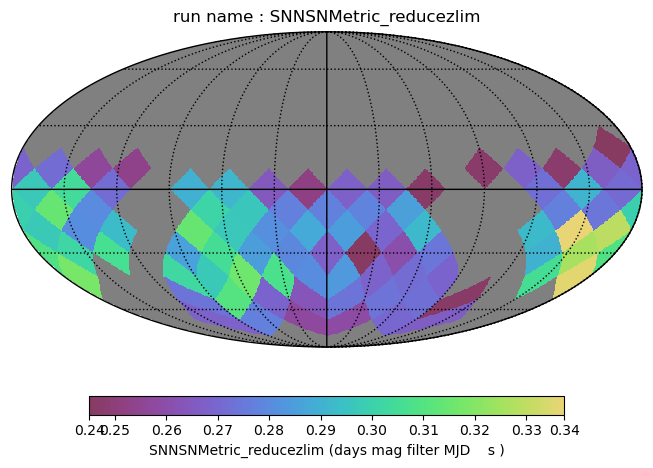

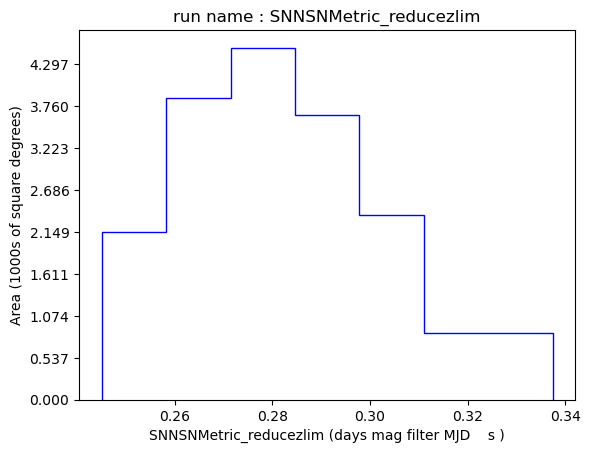

In [5]:
t1 = time.time()
bg.run_all()     
t2 = time.time()
bg.plot_all(closefigs=False)
print('runtime=', t2-t1, 's')

In [7]:
bundle.metric_values.compressed()

array([rec.array([(533.229497, 0.245041)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(889.738736, 0.253569)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(1021.36028, 0.256698)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(976.090551, 0.271609)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(775.782765, 0.269156)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(893.110778, 0.267036)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(919.421095, 0.247619)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(802.31899, 0.267975)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(764.96272, 0.247083)],
                 dtype=[('n_sn', '<f8'), ('zlim', '<f8')]),
       rec.array([(782.317238, 0.25218)],
                 dtype=[('n_sn', 

In [8]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
bg.bundle_dict

{'sn': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x7fd2a73200a0>,
 'SNNSNMetric_reducen_sn': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x7fd2b043be50>,
 'SNNSNMetric_reducezlim': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x7fd27ab34820>}

In [9]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundle_dict
print(bdict['SNNSNMetric_reducen_sn'].metric_values.compressed())
np.median(bdict['SNNSNMetric_reducen_sn'].metric_values.compressed())

[ 533.229497  889.738736 1021.36028   976.090551  775.782765  893.110778
  919.421095  802.31899   764.96272   782.317238  952.332163 1101.456266
 1175.598773 1059.490869 1143.564121 1019.94225   925.174077  841.168694
  715.434921  672.399371  858.890295  767.480092  820.647357 1058.078149
 1494.746028 1394.42377  1403.182947 1365.784366 1278.039851  964.291985
 1075.423543 1103.319828 1125.481764 1112.317604 1136.983835 1408.937199
 1548.090946 1448.229794 1372.383231 1336.244081 1442.126955 1434.685947
 1009.008044  828.695748 1101.598114 1003.904862 1005.899628 1107.243713
 1319.578226 1433.485825 1182.366732 1462.40458  1434.327029 1427.089179
 1293.503071  827.199581  931.067995  730.972031  801.981507 1314.182872
 1340.751438 1578.467471 1544.015823 1589.904752 1746.760069 1597.863159
 1359.089302  879.244751  816.664621 1037.745338 1202.125276 1008.242193
 1078.027604 1415.772141 1299.387033  413.374008  789.594529 1063.989788
 1092.355805  788.462116 1111.620245 1252.634033 10

1078.0276039999999

In [10]:
bdict['SNNSNMetric_reducezlim'].metric_values.compressed()

array([0.245041 , 0.253569 , 0.256698 , 0.271609 , 0.269156 , 0.267036 ,
       0.247619 , 0.267975 , 0.247083 , 0.25218  , 0.2649065, 0.291918 ,
       0.2898605, 0.271598 , 0.3044135, 0.297089 , 0.271098 , 0.2910855,
       0.272619 , 0.246253 , 0.26635  , 0.267903 , 0.277622 , 0.277421 ,
       0.296596 , 0.301475 , 0.2803575, 0.314585 , 0.299941 , 0.274579 ,
       0.277441 , 0.28553  , 0.278024 , 0.2882985, 0.281271 , 0.296711 ,
       0.314861 , 0.2933865, 0.280897 , 0.2974245, 0.329805 , 0.337408 ,
       0.292679 , 0.2921085, 0.269305 , 0.284906 , 0.268103 , 0.27966  ,
       0.285104 , 0.305347 , 0.286519 , 0.306601 , 0.302341 , 0.309548 ,
       0.326175 , 0.290394 , 0.274375 , 0.260627 , 0.245471 , 0.280476 ,
       0.307788 , 0.316325 , 0.297542 , 0.30288  , 0.318256 , 0.336058 ,
       0.305927 , 0.269118 , 0.271456 , 0.268648 , 0.283892 , 0.2640125,
       0.269162 , 0.310499 , 0.274113 , 0.246228 , 0.272525 , 0.27375  ,
       0.274005 , 0.257766 , 0.277254 , 0.268227 , 